In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\SKAN\Downloads\US_Heart_Patients.csv")

In [3]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Female,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,Female,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,Female,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,Male,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [75]:
def missing_check(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()/df.isnull().count().sort_values(ascending=False))
    missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
    return missing_data
missing_check(df)

,Total,Percent
glucose,391,0.092217
education,110,0.025943
BP Meds,60,0.014151
tot cholesterol,60,0.014151
cigsPerDay,31,0.007311
BMI,24,0.005660
prevalentStroke,9,0.002123
Gender,8,0.001887
Diastolic BP,5,0.001179
Systolic BP,4,0.000943


In [76]:
pd.DataFrame({'value':df["Gender"],'Missing_value':df['Gender'].isnull()})

,value,Missing_value
0,Male,False
1,Female,False
2,Male,False
3,Female,False
4,Female,False
...,...,...
4235,Female,False
4236,Female,False
4237,Female,False
4238,Male,False


In [77]:
features=df.columns

In [78]:
features=df.columns
def value_counts_check(df):
    value_counts=[]
    for i in features:
        values=dict(df[i].value_counts())      
        value_counts.append(values)
        
    value=pd.Series(value_counts)
    
    feat=pd.Series(features)
    
    value_unique=pd.concat([feat,value],axis=1,keys=["Features","Value_counts"])  
    return value_unique   
value_counts_check(df)        

,Features,Value_counts
0,Gender,"{'Female': 2414, 'Male': 1818}"
1,age,"{40.0: 192, 46.0: 182, 42.0: 180, 41.0: 174, 4..."
2,education,"{1.0: 1717, 2.0: 1252, 3.0: 688, 4.0: 473}"
3,currentSmoker,"{0.0: 2143, 1.0: 2094}"
4,cigsPerDay,"{0.0: 2145, 20.0: 734, 30.0: 217, 15.0: 210, 1..."
5,BP Meds,"{0.0: 4056, 1.0: 124}"
6,prevalentStroke,"{0.0: 4206, 1.0: 25}"
7,prevalentHyp,"{0.0: 2922, 1.0: 1316}"
8,diabetes,"{0.0: 4129, 1.0: 109}"
9,tot cholesterol,"{240.0: 85, 220.0: 70, 260.0: 62, 210.0: 61, 2..."


In [79]:
features=df.columns
def unique_check(df):
    unique=[]
    for i in features:
        uni=df[i].unique()   
        unique.append(uni)
        
    uni=pd.Series(unique)
    
    feat=pd.Series(features)
    
    unique=pd.concat([feat,uni],axis=1,keys=["Features","Unique"])  
    return unique   
unique_check(df)        

,Features,Unique
0,Gender,"[Male, Female, nan]"
1,age,"[39.0, 46.0, 48.0, 61.0, 43.0, 63.0, 45.0, 52...."
2,education,"[4.0, 2.0, 1.0, 3.0, nan]"
3,currentSmoker,"[0.0, 1.0, nan]"
4,cigsPerDay,"[0.0, 20.0, 30.0, 23.0, 15.0, 9.0, 10.0, nan, ..."
5,BP Meds,"[0.0, 1.0, nan]"
6,prevalentStroke,"[0.0, nan, 1.0]"
7,prevalentHyp,"[0.0, 1.0, nan]"
8,diabetes,"[0.0, 1.0, nan]"
9,tot cholesterol,"[195.0, 250.0, 245.0, 225.0, 285.0, 228.0, 205..."


In [80]:
features=df.columns
for column in features:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

GENDER :  2
Male      1818
Female    2414
Name: Gender, dtype: int64


AGE :  39
32.0      1
70.0      2
33.0      5
69.0      7
68.0     18
34.0     18
66.0     38
35.0     42
67.0     45
65.0     57
36.0     84
37.0     92
64.0     93
62.0     99
61.0    110
63.0    110
60.0    110
58.0    117
59.0    119
56.0    123
57.0    123
49.0    132
54.0    132
53.0    139
50.0    140
47.0    141
38.0    144
55.0    145
51.0    146
52.0    149
43.0    158
45.0    162
44.0    166
39.0    170
48.0    173
41.0    174
42.0    180
46.0    182
40.0    192
Name: age, dtype: int64


EDUCATION :  4
4.0     473
3.0     688
2.0    1252
1.0    1717
Name: education, dtype: int64


CURRENTSMOKER :  2
1.0    2094
0.0    2143
Name: currentSmoker, dtype: int64


CIGSPERDAY :  33
70.0       1
38.0       1
29.0       1
19.0       2
14.0       2
16.0       3
12.0       3
13.0       3
45.0       3
11.0       5
23.0       6
50.0       6
17.0       7
18.0       8
4.0        9
60.0      11
8.0       11
7.0       12


<Axes: >

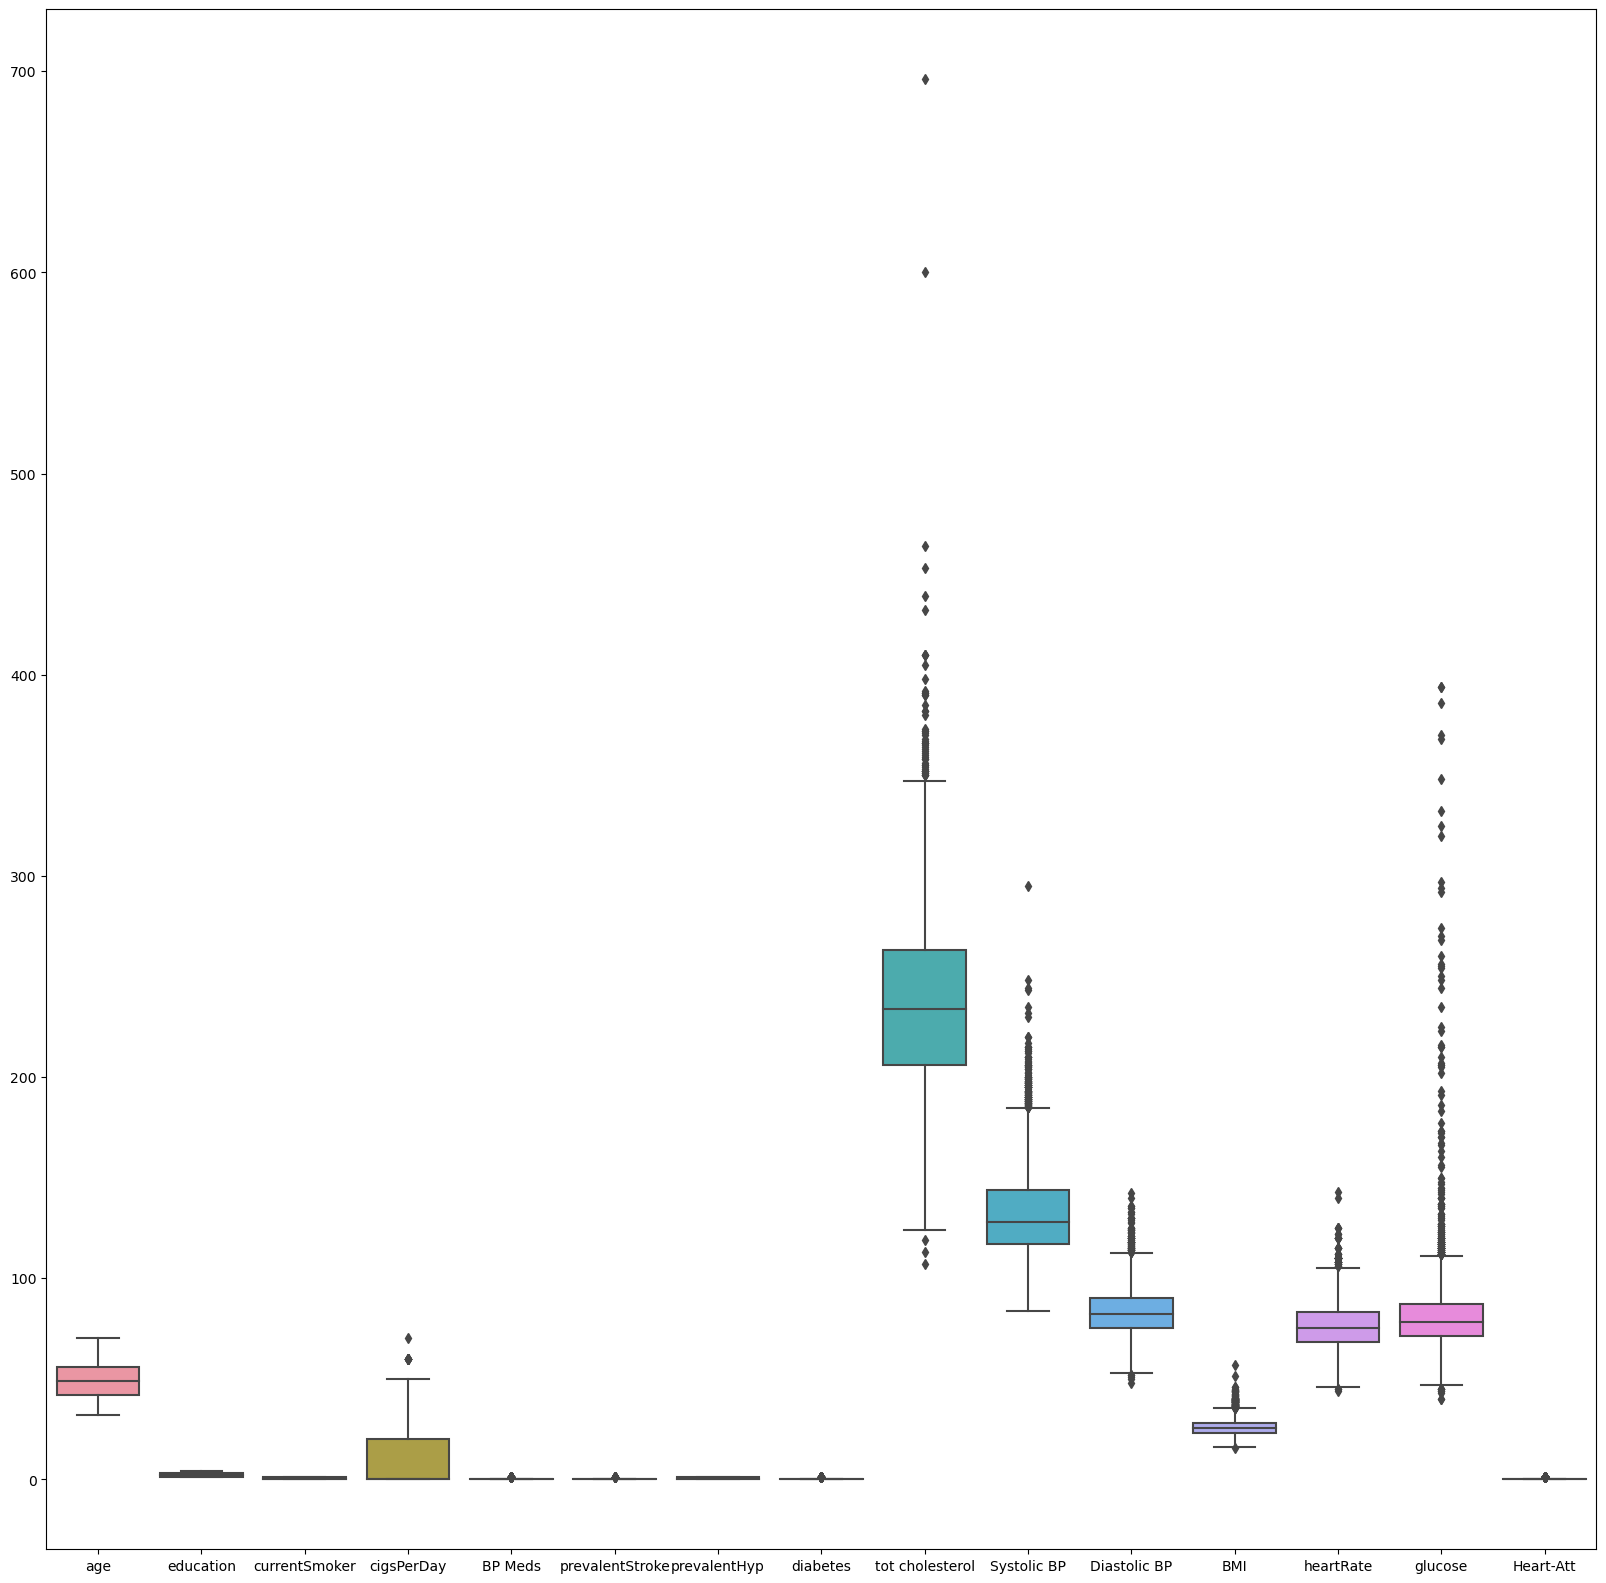

In [81]:
plt.figure(figsize=(20,20))
sns.boxplot(df)

# Impute the missing values for the categorical/factor columns

# Method 1

In [48]:
from sklearn import impute

In [49]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

In [50]:
impute_1 = impute.SimpleImputer(strategy='most_frequent',copy=False,add_indicator=True)

In [51]:
for i in df[['Gender','BP Meds','education','prevalentStroke', 'prevalentHyp', 'diabetes','currentSmoker']].columns:
    df[i] = impute_1.fit_transform(df[[i]])
    print(impute_1.statistics_)
    df[i] = impute_1.transform(df[[i]])

['Female']
[0.]
[1.]
[0.]
[0.]
[0.]
[0.]


In [52]:
impute_2 = impute.SimpleImputer(strategy='median',copy=False,add_indicator=True)

In [53]:
for i in df[['age','tot cholesterol','Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose','cigsPerDay']].columns:
    df[i] = impute_2.fit_transform(df[[i]])
    print(impute_2.statistics_)
    df[i] = impute_2.transform(df[[i]])

[49.]
[234.]
[128.]
[82.]
[25.395]
[75.]
[78.]
[0.]


# Method 2

In [110]:
for column in ['Gender','education','currentSmoker','BP Meds','prevalentStroke','prevalentHyp','diabetes']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [111]:
for i in ['age','cigsPerDay','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose']:
    df[i].fillna(df[i].median(),inplace=True)

In [112]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

# Convert all objects to categorical codes

In [24]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Gender
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
[1 0]
